In [8]:
import numpy as np

In [9]:
def read_log_file(filename):
    with open(filename) as fin:
        train_loss = []
        train_acc = []
        test_nll = []
        test_acc = []
        sparsity = []
        for line in fin:
            line_array = line.strip().split()
            if len(line_array) == 7 and line_array[0][0] not in ['-', 'e'] : 
                line_array = list(map(float, line_array))
                train_loss.append(line_array[2])
                train_acc.append(float(line_array[3]))
                test_nll.append(line_array[4])
                test_acc.append(float(line_array[5]))
            if len(line_array) == 3 and line_array[0][0] not in ['P', 't'] :
                sparsity.append(float(line_array[0]) / float(line_array[2]) * 100)
        if not len(sparsity):
            sparsity = np.ones(len(train_loss)) * 100
        sparsity = np.array(sparsity)
        sparsity = 100 - sparsity
    return list(map(np.array, [train_loss, train_acc, test_nll, test_acc, sparsity]))

In [12]:
def read_all_seeds(base_filename = "sgd.txt", seed_index_list = [1,2,3,4,5,6,7,8,9,10]):
    all_seeds_results = [[], [], [], [], []]
    for seed_index in seed_index_list:
        filename = str(seed_index) + "/" + base_filename
        results = read_log_file(filename)
        for i, result in enumerate(results):
            if not len(all_seeds_results[i]):
                all_seeds_results[i] = result
            else:
                all_seeds_results[i] = np.vstack((all_seeds_results[i], result))
    return np.array(all_seeds_results)

In [13]:
filenames_all = ['sgd.txt', 
                 'grda_c0.001_mu0.501.txt', 
                 'grda_c0.001_mu0.55.txt', 
                 'grda_c0.001_mu0.6.txt', 
                 'grda_c0.001_mu0.65.txt']

all_setting_results = []
for filename in filenames_all:
    all_seeds_results = read_all_seeds(base_filename = filename)
    all_setting_results.append(all_seeds_results)
all_setting_results = np.array(all_setting_results)

In [14]:
mean_vector = all_setting_results.mean(2)
sd_vector = all_setting_results.std(2)

In [15]:
setting_idx = 0
measure_idx = 1
epoch_idx_list = [0,24,49,74,99,199]
mean_vector[setting_idx, measure_idx, epoch_idx_list]

array([46.8182, 97.2832, 99.398 , 99.7476, 99.8456, 99.9996])

In [16]:
print(",Epoch,1,25,50,75,100,200,")
measure_name = ["training_loss", 'tr_acc (%)', "testing_loss", "te_acc (%)", "sparsity (%)"]
setting_name = ['SGD', 'gRDA(0.501)', 'gRDA(0.55)', 'gRDA(0.6)', 'gRDA(0.65)']
decimals_val = 4
for measure_idx in [0,1,2,3,4]:
    for setting_idx in range(5):
        if setting_idx == 0:
            print(measure_name[measure_idx] + ',' + setting_name[setting_idx], end=",")
        else:
            print(',' + setting_name[setting_idx], end=",")
        for epoch_idx in [1,24,49,74,99,199]:
            print(str(np.around(mean_vector[setting_idx, measure_idx, epoch_idx], decimals=decimals_val)) + 
                    "(" + str(np.around(sd_vector[setting_idx, measure_idx, epoch_idx], decimals=decimals_val)) + ")", end=",")
        print()

,Epoch,1,25,50,75,100,200,
training_loss,SGD,0.9002(0.0056),0.0778(0.002),0.0177(0.0023),0.0078(0.0016),0.0047(0.001),0.0001(0.0),
,gRDA(0.501),0.9087(0.005),0.0982(0.0014),0.0298(0.0017),0.0161(0.003),0.0124(0.003),0.0001(0.0),
,gRDA(0.55),0.9112(0.0034),0.1101(0.0018),0.0359(0.0026),0.0202(0.0026),0.0143(0.0027),0.0001(0.0),
,gRDA(0.6),0.9155(0.0027),0.1194(0.0015),0.0378(0.0022),0.0233(0.0017),0.0178(0.0052),0.0001(0.0),
,gRDA(0.65),0.9162(0.0053),0.1251(0.002),0.0442(0.0024),0.0275(0.0026),0.0209(0.0027),0.0002(0.0),
tr_acc (%),SGD,67.9678(0.2445),97.2832(0.0693),99.398(0.096),99.7476(0.0537),99.8456(0.0387),99.9996(0.0008),
,gRDA(0.501),67.7258(0.2829),96.5754(0.0475),99.0054(0.0772),99.4766(0.1011),99.587(0.1076),99.9998(0.0006),
,gRDA(0.55),67.545(0.1816),96.1636(0.0878),98.7718(0.1102),99.3382(0.101),99.5198(0.0993),99.9986(0.0018),
,gRDA(0.6),67.4044(0.1635),95.8476(0.0772),98.702(0.0927),99.2146(0.0636),99.3944(0.1851),99.9984(0.0012),
,gRDA(0.65),67.42(0.3047),95.6366(0.0744

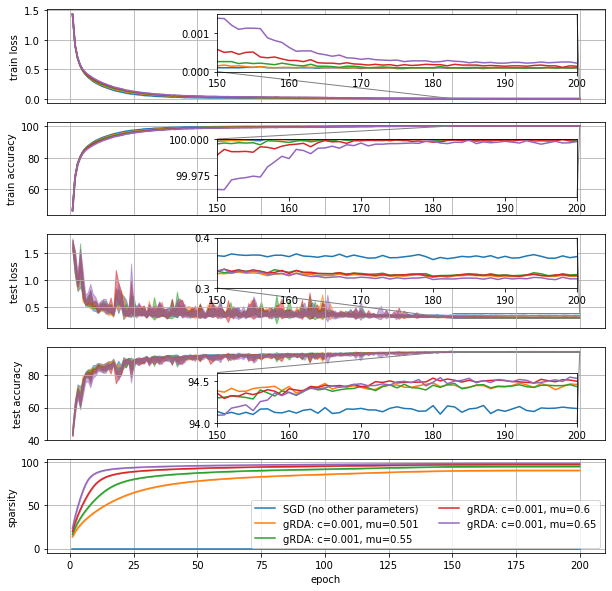

In [18]:
import matplotlib.pyplot as plt
import numpy
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, axs = plt.subplots(5, 1)
fig.set_figheight(10)
fig.set_figwidth(10)

window_size = 500
epoch_num = numpy.array(range(1,201))
setting_legends = []


axs_index = 0

################## training loss
axs_sub = axs[axs_index]
measure_idx = 0 # training loss
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    setting_legend, = axs_sub.plot(epoch_num, mean_vector[setting_idx,measure_idx,:], color=color)
    axs_sub.fill_between(epoch_num, 
                         mean_vector[setting_idx,measure_idx,:]+sd_vector[setting_idx,measure_idx,:], 
                         mean_vector[setting_idx,measure_idx,:]-sd_vector[setting_idx,measure_idx,:], 
                         color=color, alpha=0.2)
    setting_legends.append(setting_legend)
axs_sub.set_ylabel('train loss')
axs_sub.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axs_sub.grid(True)


# zoom
# axins = zoomed_inset_axes(axs_sub, 3, loc="center right", bbox_to_anchor=(600,450), borderpad=3)
axins = inset_axes(axs_sub, width=5, height=0.8, loc="center right", bbox_to_anchor=(650,600), borderpad=3)
mark_inset(axs_sub, axins, loc1=1, loc2=3, fc="none", ec="0.5")
axins.set_xlim([150,200])
axins.set_ylim([0,0.0015])

axs_sub = axins
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    axs_sub.plot(epoch_num, mean_vector[setting_idx,measure_idx,:],color=color)




################## training accuracy
axs_index += 1
axs_sub = axs[axs_index]
measure_idx = 1 # training accuracy
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    setting_legend, = axs_sub.plot(epoch_num, mean_vector[setting_idx,measure_idx,:], color=color)
    axs_sub.fill_between(epoch_num, 
                         mean_vector[setting_idx,measure_idx,:]+sd_vector[setting_idx,measure_idx,:], 
                         mean_vector[setting_idx,measure_idx,:]-sd_vector[setting_idx,measure_idx,:], 
                         color=color, alpha=0.2)
    setting_legends.append(setting_legend)
axs_sub.set_ylabel('train accuracy')
axs_sub.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axs_sub.grid(True)

# zoom
# axins = zoomed_inset_axes(axs_sub, 3, loc="center right", bbox_to_anchor=(600,450), borderpad=3)
axins = inset_axes(axs_sub, width=5, height=0.8, loc="center right", bbox_to_anchor=(650,475), borderpad=3)
mark_inset(axs_sub, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([150,200])
axins.set_ylim([99.96,100])

axs_sub = axins
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    axs_sub.plot(epoch_num, mean_vector[setting_idx,measure_idx,:],color=color)
# axs_sub.grid(True)






################## testing loss
axs_index += 1
axs_sub = axs[axs_index]
measure_idx = 2 # testing loss
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    # setting_legend, = axs_sub.plot(epoch_num, mean_vector[setting_idx,measure_idx,:], color=color)
    axs_sub.fill_between(epoch_num, 
                         mean_vector[setting_idx,measure_idx,:]+sd_vector[setting_idx,measure_idx,:], 
                         mean_vector[setting_idx,measure_idx,:]-sd_vector[setting_idx,measure_idx,:], 
                         color=color, alpha=0.5)
axs_sub.set_ylabel('test loss')
axs_sub.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axs_sub.grid(True)

# zoom
# axins = zoomed_inset_axes(axs_sub, 20, loc="center right", bbox_to_anchor=(600,300), borderpad=3)
axins = inset_axes(axs_sub, width=5, height=0.7, loc="center right", bbox_to_anchor=(650,380), borderpad=3)
mark_inset(axs_sub, axins, loc1=3, loc2=1, fc="none", ec="0.5")
axins.set_xlim([150,200])
axins.set_ylim([0.3,0.4])

axs_sub = axins
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    axs_sub.plot(epoch_num,  mean_vector[setting_idx,measure_idx,:],color=color)
plt.xticks(visible=True)
plt.yticks(visible=True)

################## testing accuracy
axs_index += 1
axs_sub = axs[axs_index]
measure_idx = 3 # testing accuracy
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    axs_sub.fill_between(epoch_num, 
                         mean_vector[setting_idx,measure_idx,:]+sd_vector[setting_idx,measure_idx,:], 
                         mean_vector[setting_idx,measure_idx,:]-sd_vector[setting_idx,measure_idx,:], 
                         color=color, alpha=0.5)
axs_sub.set_ylabel('test accuracy')
axs_sub.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
axs_sub.grid(True)

# zoom
axins = inset_axes(axs_sub, width=5, height=0.7, loc="center right", bbox_to_anchor=(650,245), borderpad=3)
mark_inset(axs_sub, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([150,200])
axins.set_ylim([94,94.6])

axs_sub = axins
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    axs_sub.plot(epoch_num,  mean_vector[setting_idx,measure_idx,:],color=color)
plt.xticks(visible=True)
plt.yticks(visible=True)



################## sparsity
axs_index += 1
axs_sub = axs[axs_index]
measure_idx = 4 # sparsity
for setting_idx in range(5):
    color = next(axs_sub._get_lines.prop_cycler)['color']
    setting_legend, = axs_sub.plot(epoch_num, mean_vector[setting_idx,measure_idx,:], color=color)
    axs_sub.fill_between(epoch_num, 
                         mean_vector[setting_idx,measure_idx,:]+sd_vector[setting_idx,measure_idx,:], 
                         mean_vector[setting_idx,measure_idx,:]-sd_vector[setting_idx,measure_idx,:], 
                         color=color, alpha=0.5)
axs_sub.set_xlabel('epoch')
axs_sub.set_ylabel('sparsity')
axs_sub.grid(True)


axs[4].legend(setting_legends,[ "SGD (no other parameters)", "gRDA: c=0.001, mu=0.501", "gRDA: c=0.001, mu=0.55", "gRDA: c=0.001, mu=0.6", "gRDA: c=0.001, mu=0.65"], loc='lower right', ncol=2)


# plt
plt.savefig("gRDA_SGD_cifar10_wrn28x10_10seeds_acc_loss.pdf")
